# CoinMarketCap API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

import missingno as msno
import warnings

from config import API_Key1

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Cryptocurrency Data

Listings Latest - Returns a paginated list of all active cryptocurrencies with latest market data.

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start': 1,
  'limit': 5000,
  'convert': 'USD'
}

# set standards and conventions for the HTTP request
headers = {
  'Accept': 'application/json',
  'Accept-Encoding': 'deflate, gzip',                    # receive data fast and efficiently
  'X-CMC_PRO_API_KEY': f'{API_Key1}'
}

try:
  response = requests.get(url=url, params=parameters, headers=headers)
  Data = json.loads(response.text)
  print(f"Status Code: {response.status_code} -- Content-Type: {response.headers['Content-Type']} -- Encoding: {response.encoding}")
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

Status Code: 200 -- Content-Type: application/json; charset=utf-8 -- Encoding: utf-8


# Append Data 

In [4]:
id = []
name = []
symbol = []
slug = []
cmc_rank = []
num_market_pairs = []
circulating_supply = []
total_supply = []
max_supply = []
last_updated = []
date_added = []
price = []
volume_24h = []
volume_change_24h = []
percent_change_1h = []
percent_change_24h = []
percent_change_7d = []
market_cap = []
market_cap_dominance = []
fully_diluted_market_cap = []
last_updated_1 = []


for i in range(5000):
  dta = Data['data'][i]
  id.append(dta['id'])
  name.append(dta['name'])
  symbol.append(dta['symbol'])
  slug.append(dta['slug'])
  cmc_rank.append(dta['cmc_rank'])
  num_market_pairs.append(dta['num_market_pairs'])
  circulating_supply.append(dta['circulating_supply'])
  total_supply.append(dta['total_supply'])
  max_supply.append(dta['max_supply'])
  last_updated.append(dta['last_updated'])
  date_added.append(dta['date_added'])
  price.append(dta['quote']['USD']['price'])
  volume_24h.append(dta['quote']['USD']['volume_24h'])
  volume_change_24h.append(dta['quote']['USD']['volume_change_24h'])
  percent_change_1h.append(dta['quote']['USD']['percent_change_1h'])
  percent_change_24h.append(dta['quote']['USD']['percent_change_24h'])
  percent_change_7d.append(dta['quote']['USD']['percent_change_7d'])
  market_cap.append(dta['quote']['USD']['market_cap'])
  market_cap_dominance.append(dta['quote']['USD']['market_cap_dominance'])
  fully_diluted_market_cap.append(dta['quote']['USD']['fully_diluted_market_cap'])
  last_updated_1.append(dta['quote']['USD']['last_updated'])

# Create Dataframe

In [5]:
data = {
  'id': id,
  'name': name,
  'symbol': symbol,
  'slug': slug,
  'cmc_rank': cmc_rank,
  'num_market_pairs': num_market_pairs,
  'circulating_supply': circulating_supply,
  'total_supply': total_supply,
  'max_supply': max_supply,
  'last_updated': last_updated,
  'date_added': date_added,
  'price': price,
  'volume_24h': volume_24h,
  'volume_change_24h': volume_change_24h,
  'percent_change_1h': percent_change_1h,
  'percent_change_24h': percent_change_24h,
  'percent_change_7d': percent_change_7d,
  'market_cap': market_cap,
  'market_cap_dominance': market_cap_dominance,
  'fully_diluted_market_cap': fully_diluted_market_cap,
  'last_updated_1': last_updated_1
}

df = pd.DataFrame(data)

# Head and Tail

In [6]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,last_updated,...,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap,last_updated_1
0,1,Bitcoin,BTC,bitcoin,1,9793,1.918658e+07,1.918658e+07,2.100000e+07,2022-10-22T18:42:00.000Z,...,1.917159e+04,1.777283e+10,-46.1588,-0.083353,0.159498,0.207889,3.678373e+11,39.9343,4.026035e+11,2022-10-22T18:42:00.000Z
1,1027,Ethereum,ETH,ethereum,2,6145,1.223739e+08,1.223739e+08,NaN,2022-10-22T18:42:00.000Z,...,1.310298e+03,7.409125e+09,-32.3856,-0.148888,1.011955,1.961996,1.603463e+11,17.4076,1.603463e+11,2022-10-22T18:42:00.000Z
2,825,Tether,USDT,tether,3,41154,6.845311e+10,7.014177e+10,NaN,2022-10-22T18:42:00.000Z,...,1.000050e+00,2.590655e+10,-38.9263,-0.000614,0.002355,-0.002135,6.845651e+10,7.4317,7.014525e+10,2022-10-22T18:42:00.000Z
3,3408,USD Coin,USDC,usd-coin,4,6579,4.392772e+10,4.392772e+10,NaN,2022-10-22T18:42:00.000Z,...,9.999452e-01,2.162386e+09,-32.9973,-0.000428,-0.007096,-0.010128,4.392532e+10,4.7684,4.392532e+10,2022-10-22T18:42:00.000Z
4,1839,BNB,BNB,bnb,5,1129,1.599807e+08,1.599807e+08,2.000000e+08,2022-10-22T18:42:00.000Z,...,2.698373e+02,4.091320e+08,-33.5052,0.086287,0.076294,-0.030270,4.316875e+10,4.6864,5.396747e+10,2022-10-22T18:42:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9455,Lemond,LEMD,lemond,4996,7,0.000000e+00,0.000000e+00,5.375064e+07,2022-10-22T18:42:00.000Z,...,1.074067e-04,6.132594e+03,-48.6414,0.582991,2.338937,7.345426,0.000000e+00,0.0000,5.773180e+03,2022-10-22T18:42:00.000Z
4996,15426,CollectCoin,CLCT,collectcoin,5000,1,0.000000e+00,1.000000e+08,1.000000e+08,2022-10-22T18:42:00.000Z,...,2.843222e-02,6.102976e+03,785.8113,-0.058286,-4.356145,-6.324800,0.000000e+00,0.0000,2.843222e+06,2022-10-22T18:42:00.000Z
4997,20892,Global Trading Xenocurrency,GTX,global-trading-xenocurrency,4997,2,0.000000e+00,0.000000e+00,1.000000e+10,2022-10-22T18:42:00.000Z,...,4.607620e-03,6.120496e+03,-57.1789,0.000220,-1.206632,-3.964857,0.000000e+00,0.0000,4.607620e+07,2022-10-22T18:42:00.000Z
4998,10262,KleeKai,KLEE,kleekai,4998,11,0.000000e+00,9.740000e+17,1.000000e+17,2022-10-22T18:42:00.000Z,...,2.609609e-11,6.110828e+03,-20.0969,-0.077667,3.697041,23.658085,0.000000e+00,0.0000,2.609609e+06,2022-10-22T18:42:00.000Z


In [7]:
df.shape

(5000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5000 non-null   int64  
 1   name                      5000 non-null   object 
 2   symbol                    5000 non-null   object 
 3   slug                      5000 non-null   object 
 4   cmc_rank                  5000 non-null   int64  
 5   num_market_pairs          5000 non-null   int64  
 6   circulating_supply        5000 non-null   float64
 7   total_supply              5000 non-null   float64
 8   max_supply                3457 non-null   float64
 9   last_updated              5000 non-null   object 
 10  date_added                5000 non-null   object 
 11  price                     5000 non-null   float64
 12  volume_24h                5000 non-null   float64
 13  volume_change_24h         5000 non-null   float64
 14  percent_

In [9]:
# drop columns
df.drop(
  columns=['slug', 'last_updated_1'], inplace=True
)

In [10]:
df.head()

,id,name,symbol,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,last_updated,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap
0,1,Bitcoin,BTC,1,9793,1.918658e+07,1.918658e+07,21000000.0,2022-10-22T18:42:00.000Z,2013-04-28T00:00:00.000Z,19171.594335,1.777283e+10,-46.1588,-0.083353,0.159498,0.207889,3.678373e+11,39.9343,4.026035e+11
1,1027,Ethereum,ETH,2,6145,1.223739e+08,1.223739e+08,NaN,2022-10-22T18:42:00.000Z,2015-08-07T00:00:00.000Z,1310.298438,7.409125e+09,-32.3856,-0.148888,1.011955,1.961996,1.603463e+11,17.4076,1.603463e+11
2,825,Tether,USDT,3,41154,6.845311e+10,7.014177e+10,NaN,2022-10-22T18:42:00.000Z,2015-02-25T00:00:00.000Z,1.000050,2.590655e+10,-38.9263,-0.000614,0.002355,-0.002135,6.845651e+10,7.4317,7.014525e+10
3,3408,USD Coin,USDC,4,6579,4.392772e+10,4.392772e+10,NaN,2022-10-22T18:42:00.000Z,2018-10-08T00:00:00.000Z,0.999945,2.162386e+09,-32.9973,-0.000428,-0.007096,-0.010128,4.392532e+10,4.7684,4.392532e+10
4,1839,BNB,BNB,5,1129,1.599807e+08,1.599807e+08,200000000.0,2022-10-22T18:42:00.000Z,2017-07-25T00:00:00.000Z,269.837325,4.091320e+08,-33.5052,0.086287,0.076294,-0.030270,4.316875e+10,4.6864,5.396747e+10


In [11]:
# transform dates
df[['last_updated', 'date_added']] = df[['last_updated', 'date_added']].applymap(lambda x: pd.to_datetime(x))
df.head()

,id,name,symbol,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,last_updated,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap
0,1,Bitcoin,BTC,1,9793,1.918658e+07,1.918658e+07,21000000.0,2022-10-22 18:42:00+00:00,2013-04-28 00:00:00+00:00,19171.594335,1.777283e+10,-46.1588,-0.083353,0.159498,0.207889,3.678373e+11,39.9343,4.026035e+11
1,1027,Ethereum,ETH,2,6145,1.223739e+08,1.223739e+08,NaN,2022-10-22 18:42:00+00:00,2015-08-07 00:00:00+00:00,1310.298438,7.409125e+09,-32.3856,-0.148888,1.011955,1.961996,1.603463e+11,17.4076,1.603463e+11
2,825,Tether,USDT,3,41154,6.845311e+10,7.014177e+10,NaN,2022-10-22 18:42:00+00:00,2015-02-25 00:00:00+00:00,1.000050,2.590655e+10,-38.9263,-0.000614,0.002355,-0.002135,6.845651e+10,7.4317,7.014525e+10
3,3408,USD Coin,USDC,4,6579,4.392772e+10,4.392772e+10,NaN,2022-10-22 18:42:00+00:00,2018-10-08 00:00:00+00:00,0.999945,2.162386e+09,-32.9973,-0.000428,-0.007096,-0.010128,4.392532e+10,4.7684,4.392532e+10
4,1839,BNB,BNB,5,1129,1.599807e+08,1.599807e+08,200000000.0,2022-10-22 18:42:00+00:00,2017-07-25 00:00:00+00:00,269.837325,4.091320e+08,-33.5052,0.086287,0.076294,-0.030270,4.316875e+10,4.6864,5.396747e+10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        5000 non-null   int64              
 1   name                      5000 non-null   object             
 2   symbol                    5000 non-null   object             
 3   cmc_rank                  5000 non-null   int64              
 4   num_market_pairs          5000 non-null   int64              
 5   circulating_supply        5000 non-null   float64            
 6   total_supply              5000 non-null   float64            
 7   max_supply                3457 non-null   float64            
 8   last_updated              5000 non-null   datetime64[ns, UTC]
 9   date_added                5000 non-null   datetime64[ns, UTC]
 10  price                     5000 non-null   float64            
 11  volume_24h       

In [13]:
pd.value_counts(df.dtypes)

float64                12
int64                   3
object                  2
datetime64[ns, UTC]     2
dtype: int64

In [14]:
# change data type
df = df.astype(
  {
    'cmc_rank': 'category'
  }
)

In [15]:
pd.value_counts(df.dtypes)

float64                12
int64                   2
object                  2
datetime64[ns, UTC]     2
category                1
dtype: int64

In [16]:
# generate descriptive statistics
df.drop(columns=['id', 'cmc_rank']).describe()

,num_market_pairs,circulating_supply,total_supply,max_supply,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap
count,5000.000000,5.000000e+03,5.000000e+03,3.457000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03
mean,35.112400,3.418406e+14,1.215969e+15,2.006564e+15,1.594202e+02,1.422683e+07,2.818187e+03,-0.092792,4.266025,2.223555e+02,1.917504e+08,0.020002,3.457787e+12
std,639.416701,1.507879e+16,2.620345e+16,3.626004e+16,4.920232e+03,4.611736e+08,8.075186e+04,4.808980,132.012707,1.531701e+04,5.851140e+09,0.635062,1.613461e+14
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.181326e-18,0.000000e+00,-1.000000e+02,-84.915477,-96.546696,-9.784448e+01,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,0.000000e+00,1.369614e+07,1.000000e+08,1.238367e-03,9.233907e+03,-3.140802e+01,-0.232211,-1.215739,-7.041967e+00,0.000000e+00,0.000000,4.871115e+05
50%,6.000000,7.246440e+05,2.061810e+08,6.473676e+08,1.442208e-02,5.253540e+04,-2.838950e+00,-0.050643,0.159498,-8.075565e-01,8.537532e+03,0.000000,4.269554e+06
75%,13.000000,1.148223e+08,1.133910e+09,3.000000e+09,1.835099e-01,3.115116e+05,8.400125e+00,0.119885,1.641877,2.298758e+00,1.591597e+06,0.000000,3.927958e+07
max,41154.000000,9.818468e+17,1.000000e+18,1.000000e+18,3.273912e+05,2.590655e+10,4.572292e+06,104.880223,5818.706543,1.083001e+06,3.678373e+11,39.934300,8.917570e+15


# Missing Values Exploration

In [17]:
# count of missing values per column
df.isna().sum()

id                             0
name                           0
symbol                         0
cmc_rank                       0
num_market_pairs               0
circulating_supply             0
total_supply                   0
max_supply                  1543
last_updated                   0
date_added                     0
price                          0
volume_24h                     0
volume_change_24h              0
percent_change_1h              0
percent_change_24h             0
percent_change_7d              0
market_cap                     0
market_cap_dominance           0
fully_diluted_market_cap       0
dtype: int64

<AxesSubplot:>

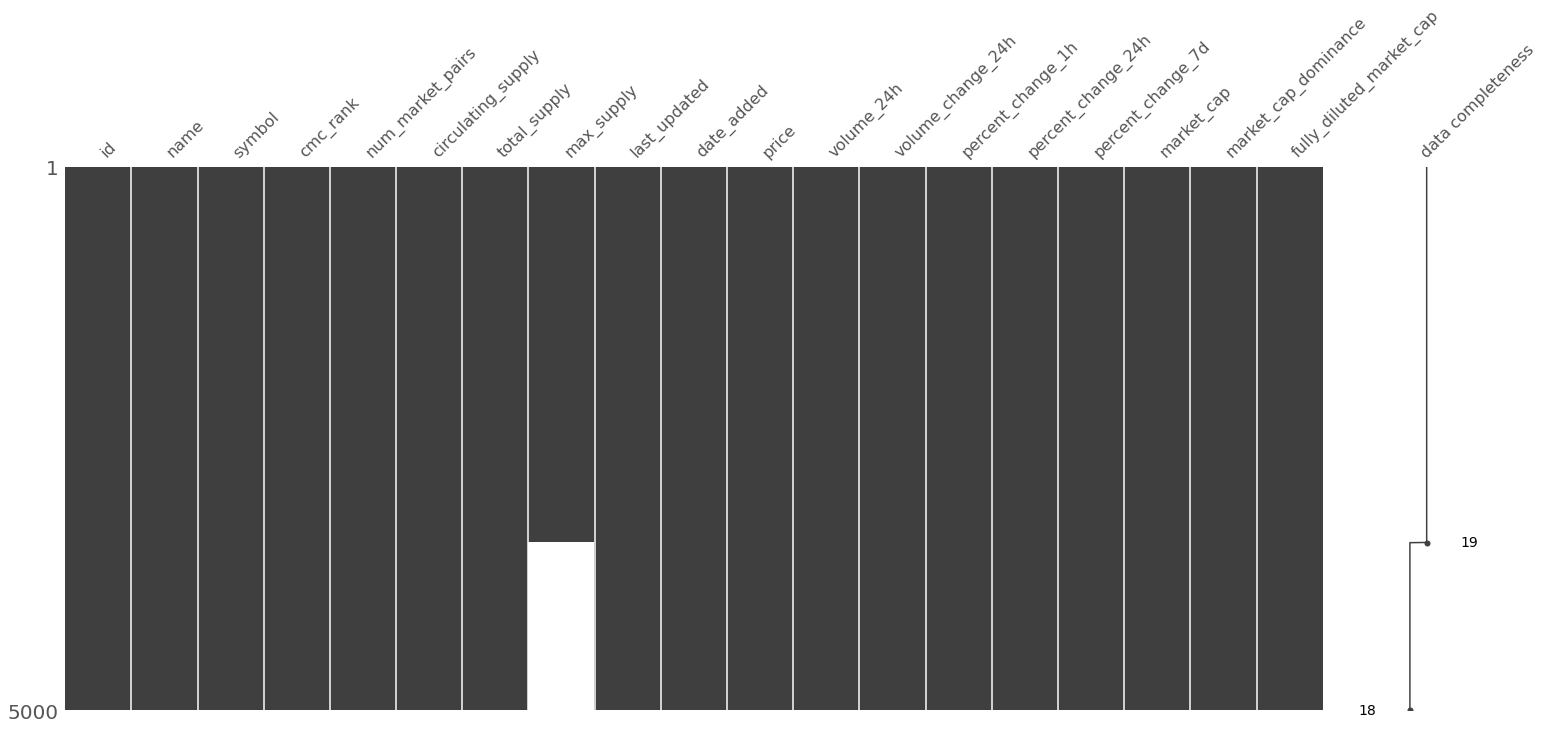

In [18]:
msno.matrix(df, labels=True, sort='descending')

In [19]:
# proportion of missing values per column
percent_missing = (df.isna().sum() * 100) / (len(df))
pd.DataFrame(percent_missing, columns=['percent_missing (%)'])

,percent_missing (%)
id,0.00
name,0.00
symbol,0.00
cmc_rank,0.00
num_market_pairs,0.00
circulating_supply,0.00
total_supply,0.00
max_supply,30.86
last_updated,0.00
date_added,0.00


In [20]:
# filter max_supply with missing values
df.loc[df['max_supply'].isna()]

,id,name,symbol,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,last_updated,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap
1,1027,Ethereum,ETH,2,6145,1.223739e+08,1.223739e+08,NaN,2022-10-22 18:42:00+00:00,2015-08-07 00:00:00+00:00,1310.298438,7.409125e+09,-32.3856,-0.148888,1.011955,1.961996,1.603463e+11,17.4076,1.603463e+11
2,825,Tether,USDT,3,41154,6.845311e+10,7.014177e+10,NaN,2022-10-22 18:42:00+00:00,2015-02-25 00:00:00+00:00,1.000050,2.590655e+10,-38.9263,-0.000614,0.002355,-0.002135,6.845651e+10,7.4317,7.014525e+10
3,3408,USD Coin,USDC,4,6579,4.392772e+10,4.392772e+10,NaN,2022-10-22 18:42:00+00:00,2018-10-08 00:00:00+00:00,0.999945,2.162386e+09,-32.9973,-0.000428,-0.007096,-0.010128,4.392532e+10,4.7684,4.392532e+10
6,4687,Binance USD,BUSD,7,5316,2.162810e+10,2.162810e+10,NaN,2022-10-22 18:42:00+00:00,2019-09-20 00:00:00+00:00,1.000310,3.724335e+09,-38.6181,0.009594,-0.020887,0.008107,2.163480e+10,2.3487,2.163480e+10
8,5426,Solana,SOL,9,393,3.582428e+08,5.116169e+08,NaN,2022-10-22 18:42:00+00:00,2020-04-10 00:00:00+00:00,27.750763,5.357790e+08,-47.2522,-0.085247,-0.543749,-7.172142,9.941511e+09,1.0793,1.419776e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,8344,Grayscale Bitcoin Trust tokenized stock FTX,GBTC,4987,1,0.000000e+00,0.000000e+00,NaN,2022-10-22 18:42:00+00:00,2021-01-27 00:00:00+00:00,11.595000,6.266550e+03,-84.3600,-0.086170,0.000000,2.519894,0.000000e+00,0.0000,0.000000e+00
4989,12887,Parallel Finance,PARA,4990,2,0.000000e+00,0.000000e+00,NaN,2022-10-22 18:42:00+00:00,2021-10-19 10:07:23+00:00,0.017122,6.242673e+03,37.3366,-0.721896,-1.461119,-0.099876,0.000000e+00,0.0000,0.000000e+00
4990,6080,3X Long Cosmos Token,ATOMBULL,4993,2,0.000000e+00,2.055229e+03,NaN,2022-10-22 18:42:00+00:00,2020-08-03 00:00:00+00:00,0.000009,6.174365e+03,-54.5330,-0.804847,5.093473,-0.854701,0.000000e+00,0.0000,2.000000e-02
4992,19281,MAD Bucks,MAD,4991,8,0.000000e+00,6.500000e+06,NaN,2022-10-22 18:42:00+00:00,2022-04-03 18:23:23+00:00,0.109131,6.210497e+03,-73.1190,-0.785467,-4.892573,-28.395650,0.000000e+00,0.0000,7.093485e+05


In [21]:
# drop max_supply column due to percentage missing values for that column
df.drop(columns=['max_supply'], inplace=True) 

In [22]:
df.isna().sum()

id                          0
name                        0
symbol                      0
cmc_rank                    0
num_market_pairs            0
circulating_supply          0
total_supply                0
last_updated                0
date_added                  0
price                       0
volume_24h                  0
volume_change_24h           0
percent_change_1h           0
percent_change_24h          0
percent_change_7d           0
market_cap                  0
market_cap_dominance        0
fully_diluted_market_cap    0
dtype: int64

# Duplicates Exploration

In [23]:
# check duplicates in the dataframe
df.duplicated().sum()

0

In [24]:
# check for duplicates in the id, name, symbol and cmc_rank
df.loc[df.duplicated(subset=['id', 'name', 'symbol', 'cmc_rank'])]

,id,name,symbol,cmc_rank,num_market_pairs,circulating_supply,total_supply,last_updated,date_added,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap,market_cap_dominance,fully_diluted_market_cap


# Data Visualization

In [25]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def original(x, pos):
    return '%1.0f' % (x * 1)

format_orig = FuncFormatter(original)


def thousand(x, pos):
    return '%1.0fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def million(x, pos):
    return '%1.0fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def billion(x, pos):
    return '%1.0fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


# barplot helper function
def plot_bar(data, width, y, color: list | str, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()

    # plot horizontal bar plot
    ax.barh(
    data=data,
    width=width, y=y, 
    color=color
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set yaxis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar


def plot_line(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
  # create figure and axis
  fig, ax = plt.subplots()
  fig.autofmt_xdate()

  # plot line chart
  sns.lineplot(
  data=data, 
  x=x, y=y, 
  hue=hue, palette=palette,
  size=size, style=style, 
  ax=ax
  )

  # label plot axis
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

  # format y-axis
  ax.yaxis.set_major_formatter(formatter=formatter)

  return plot_line

<function __main__.plot_bar(data, width, y, color: list | str, title=None, xlabel=None, ylabel=None, formatter=None)>

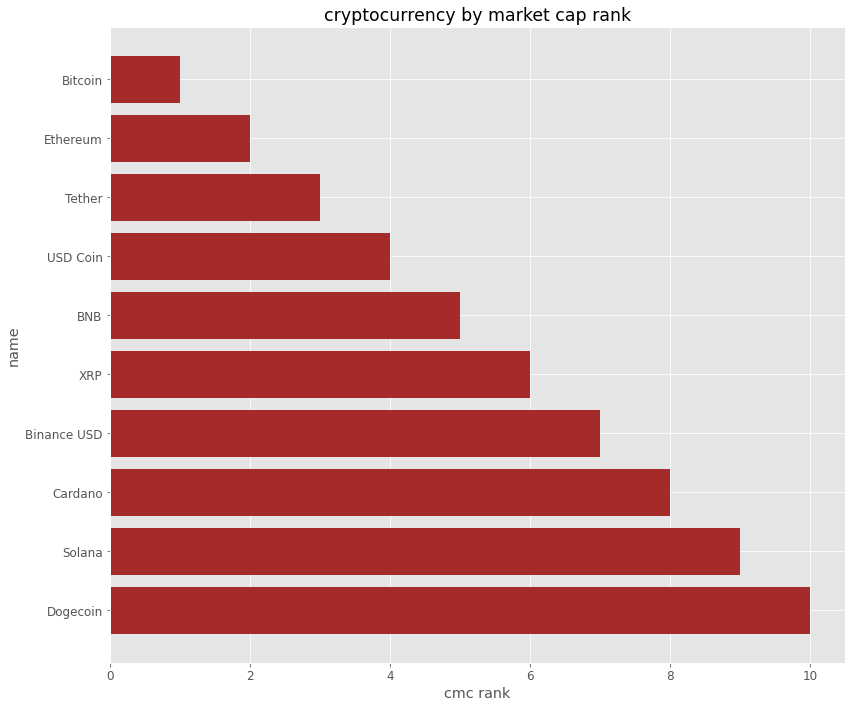

In [26]:
# find the top 10 cryptocurrency by market cap rank
plot_bar(
  data=df[['name', 'cmc_rank']][:10].sort_values(by='cmc_rank', ascending=False),
  y='name', width='cmc_rank',
  color='brown',
  title='cryptocurrency by market cap rank', xlabel='cmc rank', ylabel='name',
  formatter=format_orig
)

<function __main__.plot_bar(data, width, y, color: list | str, title=None, xlabel=None, ylabel=None, formatter=None)>

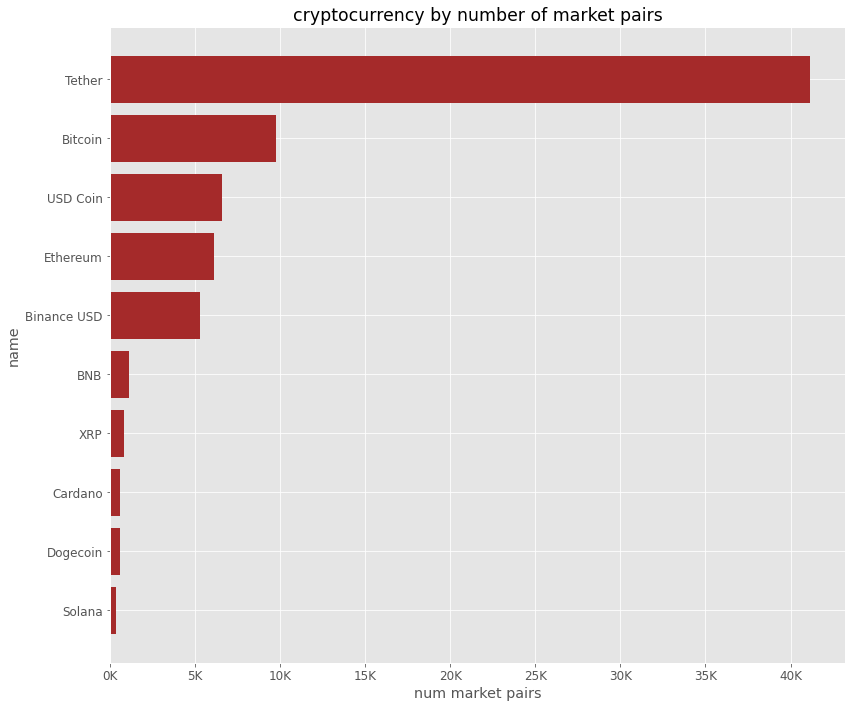

In [27]:
# find the top 10 cryptocurrency by number of market pairs across all exchanges trading each currency
plot_bar(
  data=df[['name', 'num_market_pairs']][:10].sort_values(by='num_market_pairs', ascending=True),
  y='name', width='num_market_pairs',
  color='brown', 
  title='cryptocurrency by number of market pairs', xlabel='num market pairs', ylabel='name',
  formatter=format_tsd
)

<function __main__.plot_bar(data, width, y, color: list | str, title=None, xlabel=None, ylabel=None, formatter=None)>

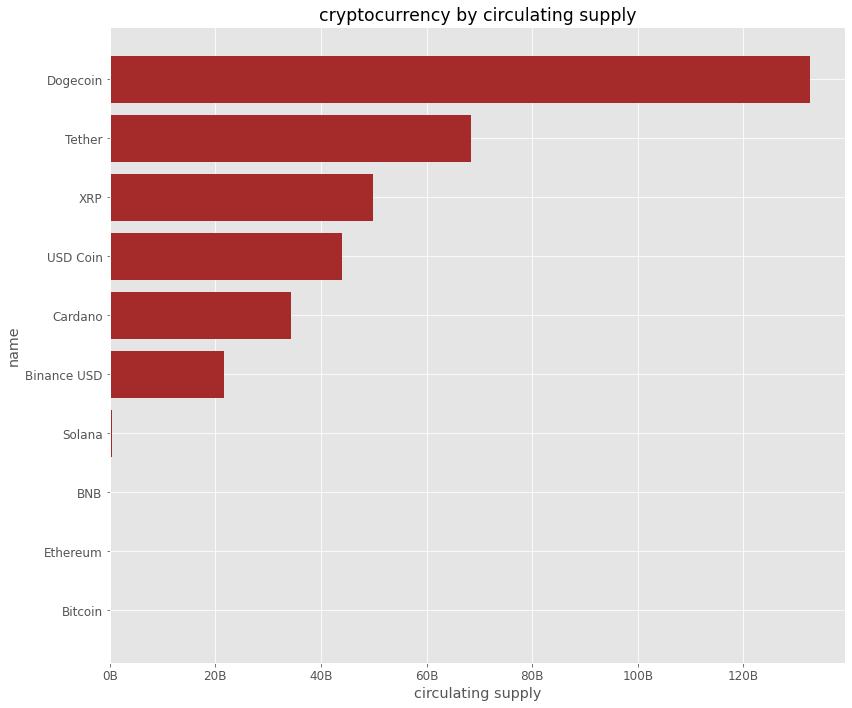

In [28]:
# find the top 10 cryptocurrency by number of coins currently in circulation
plot_bar(
  data=df[['name', 'circulating_supply']][:10].sort_values(by='circulating_supply', ascending=True),
  y='name', width='circulating_supply',
  color='brown',
  title='cryptocurrency by circulating supply', xlabel='circulating supply', ylabel='name',
  formatter=format_bill
)

<function __main__.plot_bar(data, width, y, color: list | str, title=None, xlabel=None, ylabel=None, formatter=None)>

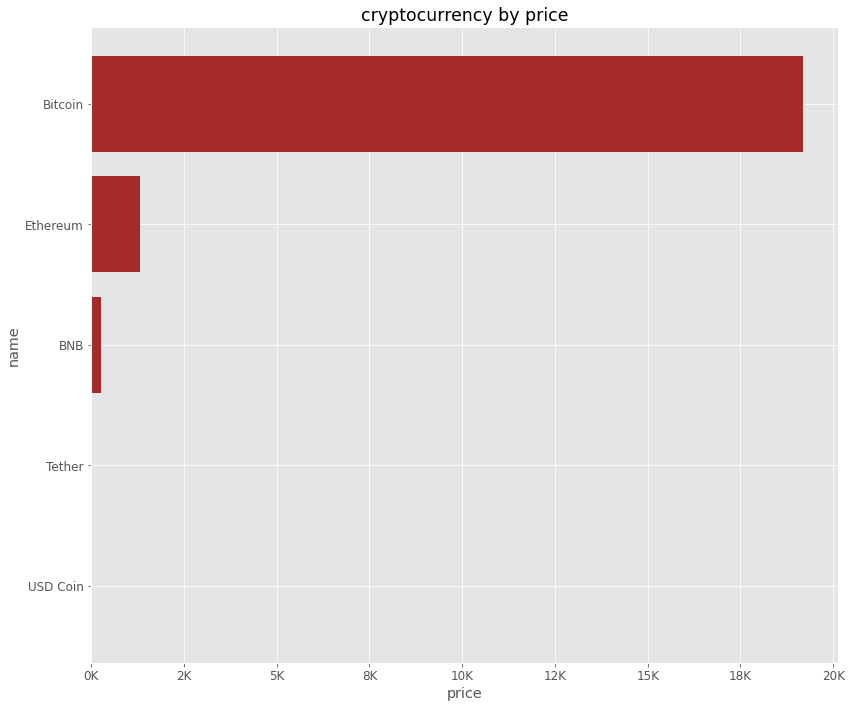

In [29]:
# find the top 5 cryptocurrency by latest average trade price across markets
plot_bar(
  data=df[['name', 'price']][:5].sort_values(by='price', ascending=True),
  y='name', width='price',
  color='brown',
  title='cryptocurrency by price', xlabel='price', ylabel='name',
  formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

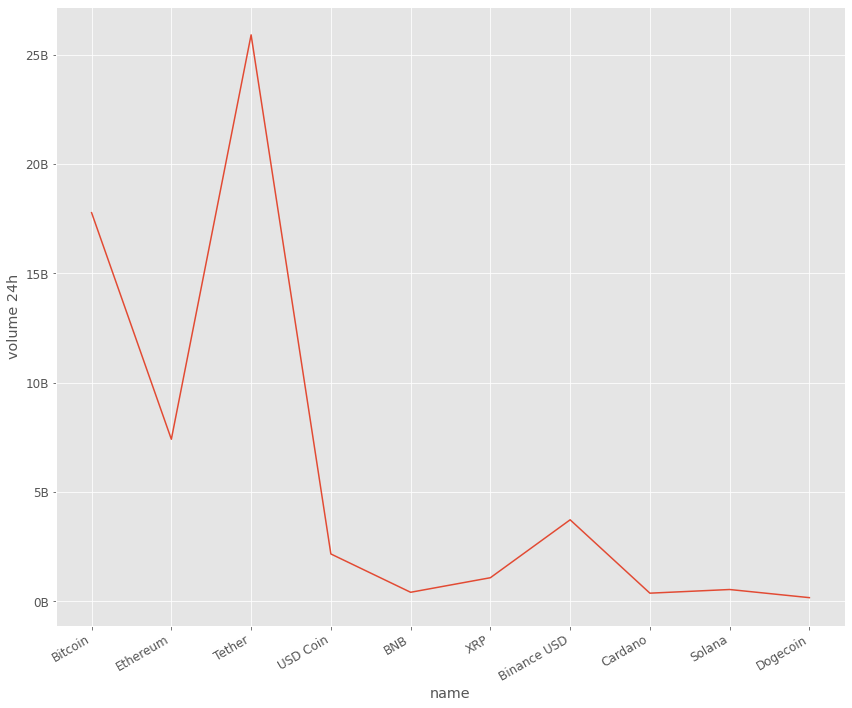

In [30]:
# cryptocurrency by rolling 24 hour adjusted trading volume
plot_line(
  data=df[:10],
  x='name', y='volume_24h',
  xlabel='name', ylabel='volume 24h',
  formatter=format_bill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

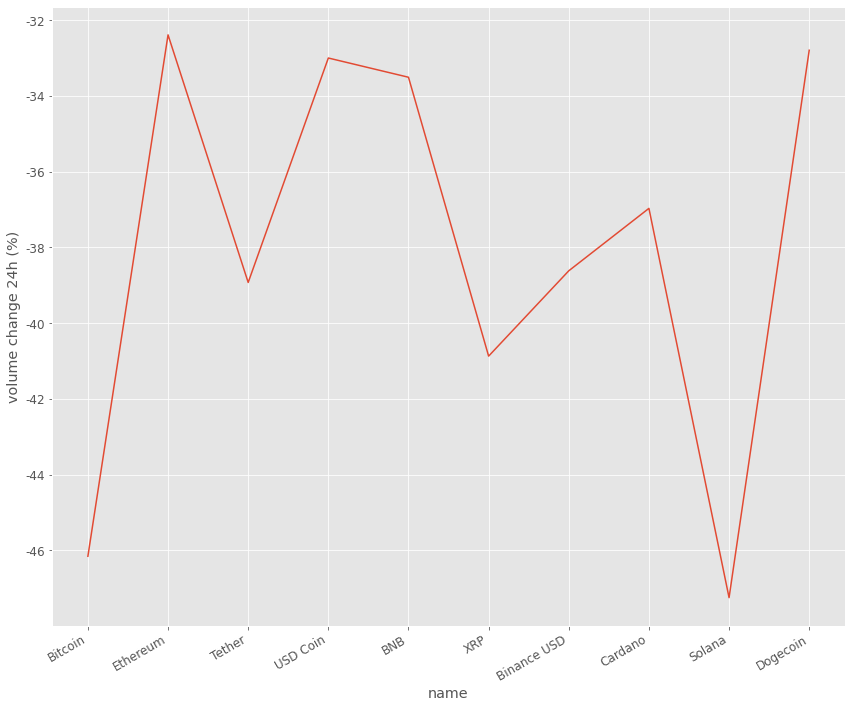

In [31]:
# find the volume change in the last 24 hours
plot_line(
  data=df[:10],
  x='name', y='volume_change_24h',
  xlabel='name', ylabel='volume change 24h (%)',
  formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

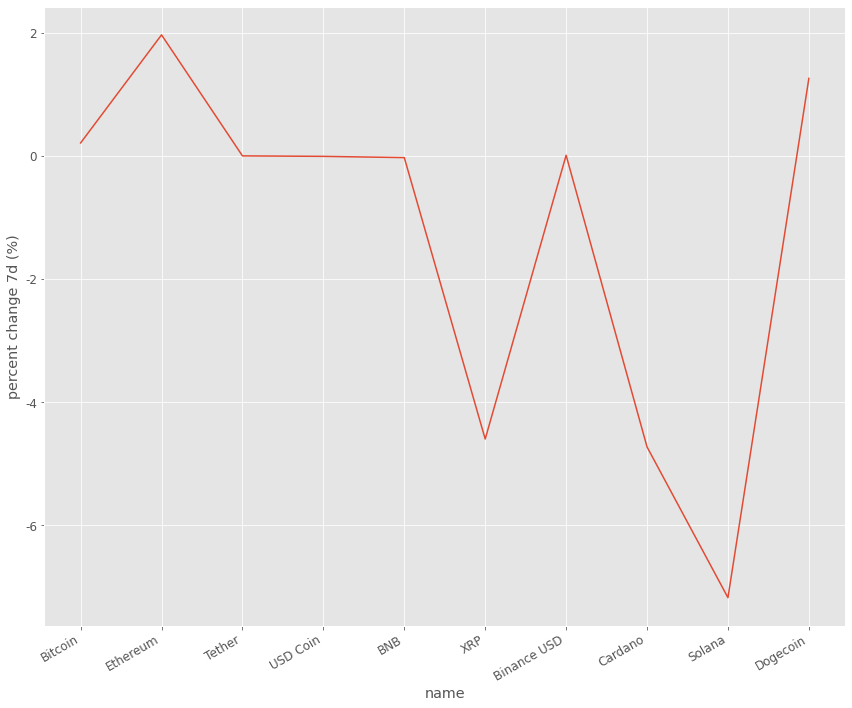

In [32]:
# cryptocurrency by rolling 24 hour adjusted trading volume
plot_line(
  data=df[:10],
  x='name', y='percent_change_7d',
  xlabel='name', ylabel='percent change 7d (%)',
  formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

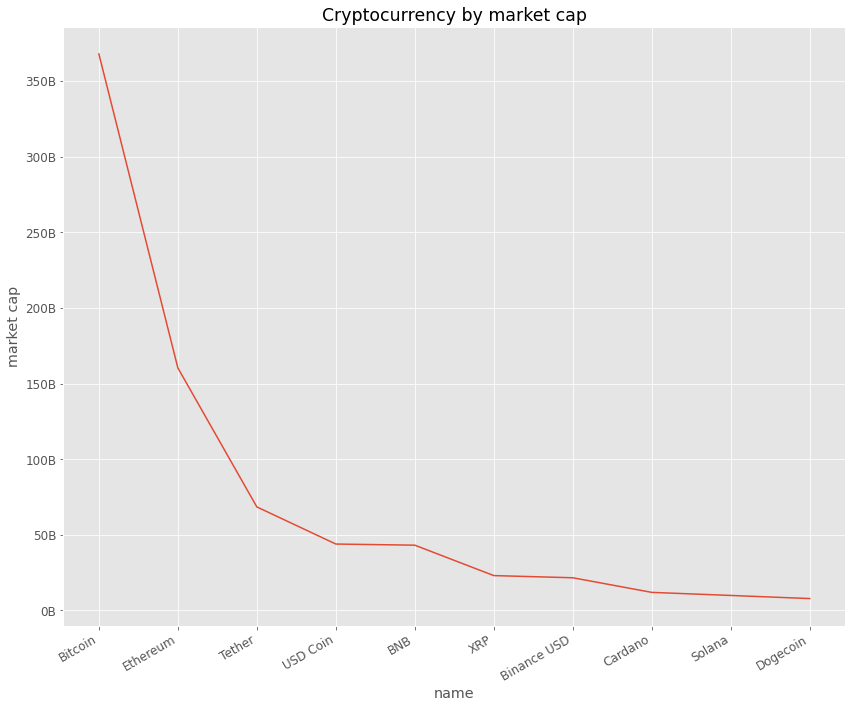

In [33]:
# cryptocurrency by market cap
plot_line(
  data=df[:10],
  x='name', y='market_cap',
  title='Cryptocurrency by market cap', xlabel='name', ylabel='market cap',
  formatter=format_bill
)